In [304]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import glob as gb
import pathlib
import os
import re
import string 


%matplotlib inline

import seaborn as sns

from numpy import mean


from sklearn.preprocessing import StandardScaler

#  NLTK Libraries
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


pd.set_option('display.max_columns', None)


Resources for metadata:
https://archive.physionet.org/mimic2/UserGuide/node12.html

In [305]:
selected_directory = "fill here with location of folder containing all the csv files"


dataframes = {}

csv_files = [file for file in os.listdir(selected_directory) if file.endswith(".csv")]

file_names = [os.path.splitext(os.path.basename(file))[0] for file in csv_files]

for i in range(len(file_names)):
    
    file_path = os.path.join(selected_directory, csv_files[i])
    
    dataframes[file_names[i]]  = pd.read_csv(file_path)






C:\Users\farha\AppData\Local\Temp\ipykernel_5300\3599686050.py:14: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,15,16,17,18,21,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[file_names[i]]  = pd.read_csv(file_path)


# ADMISSIONS DATASET

In [306]:
df_admissions = dataframes["admissions"].copy()

df_admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0


# DIAGNOSES_ICD

In [312]:
df_diagnoses = dataframes["diagnoses_icd"].copy()

df_diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10035185,22580999,3,4139,9
1,10035185,22580999,10,V707,9
2,10035185,22580999,1,41401,9
3,10035185,22580999,9,3899,9
4,10035185,22580999,11,V8532,9


In [313]:
df_diagnoses.isna().sum()

subject_id     0
hadm_id        0
seq_num        0
icd_code       0
icd_version    0
dtype: int64

In [314]:
df_diagnoses.shape

(4506, 5)

# PROCEDURES_ICD

In [315]:
df_procedures = dataframes["procedures_icd"].copy()

df_procedures.head()

,subject_id,hadm_id,seq_num,chartdate,icd_code,icd_version
0,10011398,27505812,3,2146-12-15,3961,9
1,10011398,27505812,2,2146-12-15,3615,9
2,10011398,27505812,1,2146-12-15,3614,9
3,10014729,23300884,4,2125-03-23,3897,9
4,10014729,23300884,1,2125-03-20,3403,9


In [316]:
df_procedures.shape

(722, 6)

# DRGCODES

In [317]:
df_drgcode = dataframes["drgcodes"].copy()

df_drgcode.head()

,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,10004235,22187210,HCFA,864,FEVER,NaN,NaN
1,10026255,22059910,HCFA,180,RESPIRATORY NEOPLASMS W MCC,NaN,NaN
2,10032725,20611640,HCFA,54,NERVOUS SYSTEM NEOPLASMS W MCC,NaN,NaN
3,10005866,21636229,HCFA,393,OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC,NaN,NaN
4,10008454,20291550,HCFA,956,"LIMB REATTACHMENT, HIP & FEMUR PROC FOR MULTIP...",NaN,NaN


In [318]:
df_drgcode.shape

(454, 7)

In [319]:
df_drgcode.isna().sum()

subject_id         0
hadm_id            0
drg_type           0
drg_code           0
description        0
drg_severity     233
drg_mortality    233
dtype: int64

# HCPS

> HCPCS Level I is comprised of Current Procedural Terminology (CPT®), a numeric coding
system maintained by the American Medical Association (AMA). CPT® is a uniform coding
system consisting of descriptive terms and codes that are used primarily to identify medical
services and procedures furnished by physicians and other health care professionals. These health
care professionals use CPT® to identify services and procedures for which they bill public or
private health insurance programs. CPT® codes are republished and updated annually by the
AMA.
REF: https://www.cms.gov/Medicare/Coding/MedHCPCSGenInfo/Downloads/2018-11-30-HCPCS-Level2-Coding-Procedure.pdf

In [320]:
df_hcps = dataframes["d_hcpcs"].copy()
df_hcps.head()

,code,category,long_description,short_description
0,TD,NaN,Rn,Rn
1,A0428,NaN,"Ambulance service, basic life support, non-eme...",Bls
2,V5272,NaN,"Assistive listening device, tdd",Tdd
3,S2080,NaN,Laser-assisted uvulopalatoplasty (laup),Laup
4,S8037,NaN,Magnetic resonance cholangiopancreatography (m...,Mrcp


In [321]:
df_hcps.shape

(89200, 4)

In [322]:
df_hcps.isna().sum()

code                     0
category              6844
long_description     82400
short_description        0
dtype: int64

# ICD_Diagnoses

In [323]:
df_diagnos = dataframes["d_icd_diagnoses"].copy()

df_diagnos.head()

,icd_code,icd_version,long_title
0,0090,9,"Infectious colitis, enteritis, and gastroenter..."
1,01160,9,"Tuberculous pneumonia [any form], unspecified"
2,01186,9,"Other specified pulmonary tuberculosis, tuberc..."
3,01200,9,"Tuberculous pleurisy, unspecified"
4,01236,9,"Tuberculous laryngitis, tubercle bacilli not f..."


In [324]:
df_diagnos.shape

(109775, 3)

In [325]:
df_diagnos.isna().sum()

icd_code       0
icd_version    0
long_title     0
dtype: int64

# ICD_Procedures

In [326]:
df_proced = dataframes["d_icd_procedures"].copy()

df_proced.head()

,icd_code,icd_version,long_title
0,0039,9,Other computer assisted surgery
1,0048,9,Insertion of four or more vascular stents
2,0074,9,"Hip bearing surface, metal-on-polyethylene"
3,0077,9,"Hip bearing surface, ceramic-on-polyethylene"
4,0126,9,Insertion of catheter(s) into cranial cavity o...


In [327]:
for filename in os.listdir(selected_directory):
    if filename.endswith(".csv"):
        print(os.path.splitext(filename)[0])


admissions
diagnoses_icd
drgcodes
d_hcpcs
d_icd_diagnoses
d_icd_procedures
d_labitems
emar
emar_detail
hcpcsevents
labevents
microbiologyevents
omr
patients
pharmacy
poe
poe_detail
prescriptions
procedures_icd
provider
services
transfers


In [328]:
dataframes["drgcodes"].head()

,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,10004235,22187210,HCFA,864,FEVER,NaN,NaN
1,10026255,22059910,HCFA,180,RESPIRATORY NEOPLASMS W MCC,NaN,NaN
2,10032725,20611640,HCFA,54,NERVOUS SYSTEM NEOPLASMS W MCC,NaN,NaN
3,10005866,21636229,HCFA,393,OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC,NaN,NaN
4,10008454,20291550,HCFA,956,"LIMB REATTACHMENT, HIP & FEMUR PROC FOR MULTIP...",NaN,NaN


# PATIENTS


In [329]:
df_patients = dataframes["patients"].copy()

df_patients.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10014729,F,21,2125,2011 - 2013,NaN
1,10003400,F,72,2134,2011 - 2013,2137-09-02
2,10002428,F,80,2155,2011 - 2013,NaN
3,10032725,F,38,2143,2011 - 2013,2143-03-30
4,10027445,F,48,2142,2011 - 2013,2146-02-09


In [330]:
df_patients.shape

(100, 6)

# DIAGNOSES JOINS

In [331]:
df_diagnoses_patients = df_diagnoses.merge(df_patients, left_on = 'subject_id', right_on = 'subject_id')

df_diagnoses_patients.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10035185,22580999,3,4139,9,M,70,2120,2014 - 2016,NaN
1,10035185,22580999,10,V707,9,M,70,2120,2014 - 2016,NaN
2,10035185,22580999,1,41401,9,M,70,2120,2014 - 2016,NaN
3,10035185,22580999,9,3899,9,M,70,2120,2014 - 2016,NaN
4,10035185,22580999,11,V8532,9,M,70,2120,2014 - 2016,NaN


In [332]:
df_diagnoses_patients_adm = df_diagnoses_patients.merge(df_admissions, left_on = 'hadm_id', right_on = 'hadm_id' )

df_diagnoses_patients_adm.head()

,subject_id_x,hadm_id,seq_num,icd_code,icd_version,gender,anchor_age,anchor_year,anchor_year_group,dod,subject_id_y,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10035185,22580999,3,4139,9,M,70,2120,2014 - 2016,NaN,10035185,2120-05-12 12:53:00,2120-05-17 16:00:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0
1,10035185,22580999,10,V707,9,M,70,2120,2014 - 2016,NaN,10035185,2120-05-12 12:53:00,2120-05-17 16:00:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0
2,10035185,22580999,1,41401,9,M,70,2120,2014 - 2016,NaN,10035185,2120-05-12 12:53:00,2120-05-17 16:00:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0
3,10035185,22580999,9,3899,9,M,70,2120,2014 - 2016,NaN,10035185,2120-05-12 12:53:00,2120-05-17 16:00:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0
4,10035185,22580999,11,V8532,9,M,70,2120,2014 - 2016,NaN,10035185,2120-05-12 12:53:00,2120-05-17 16:00:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0


In [333]:
df_diagnoses_patients_adm = df_diagnoses_patients_adm.merge(df_diagnos, left_on = 'icd_code', right_on = 'icd_code' )


In [334]:
df_diagnoses_patients_adm.head(30)

,subject_id_x,hadm_id,seq_num,icd_code,icd_version_x,gender,anchor_age,anchor_year,anchor_year_group,dod,subject_id_y,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,icd_version_y,long_title
0,10035185,22580999,3,4139,9,M,70,2120,2014 - 2016,NaN,10035185,2120-05-12 12:53:00,2120-05-17 16:00:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,9,Other and unspecified angina pectoris
1,10005348,29176490,3,4139,9,M,76,2128,2011 - 2013,NaN,10005348,2129-05-22 16:00:00,2129-05-23 11:30:00,0,DIRECT OBSERVATION,P132L1,PHYSICIAN REFERRAL,NaN,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,9,Other and unspecified angina pectoris
2,10035185,22580999,10,V707,9,M,70,2120,2014 - 2016,NaN,10035185,2120-05-12 12:53:00,2120-05-17 16:00:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,9,Examination of participant in clinical trial
3,10035185,22580999,10,V707,9,M,70,2120,2014 - 2016,NaN,10035185,2120-05-12 12:53:00,2120-05-17 16:00:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,10,Person on outside of bus injured in collision ...
4,10012552,27089790,8,V707,9,M,78,2140,2014 - 2016,NaN,10012552,2140-03-22 17:18:00,2140-03-30 14:10:00,0,URGENT,P47E1G,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,UNKNOWN,NaN,NaN,0,9,Examination of participant in clinical trial
5,10012552,27089790,8,V707,9,M,78,2140,2014 - 2016,NaN,10012552,2140-03-22 17:18:00,2140-03-30 14:10:00,0,URGENT,P47E1G,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,UNKNOWN,NaN,NaN,0,10,Person on outside of bus injured in collision ...
6,10005817,20626031,9,V707,9,M,66,2132,2014 - 2016,2135-01-19,10005817,2132-12-12 01:43:00,2132-12-20 15:04:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0,9,Examination of participant in clinical trial
7,10005817,20626031,9,V707,9,M,66,2132,2014 - 2016,2135-01-19,10005817,2132-12-12 01:43:00,2132-12-20 15:04:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0,10,Person on outside of bus injured in collision ...
8,10005348,25239799,21,V707,9,M,76,2128,2011 - 2013,NaN,10005348,2130-10-26 17:03:00,2130-11-02 16:00:00,0,EW EMER.,P38RSS,PROCEDURE SITE,SKILLED NURSING FACILITY,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,9,Examination of participant in clinical trial
9,10005348,25239799,21,V707,9,M,76,2128,2011 - 2013,NaN,10005348,2130-10-26 17:03:00,2130-11-02 16:00:00,0,EW EMER.,P38RSS,PROCEDURE SITE,SKILLED NURSING FACILITY,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,10,Person on outside of bus injured in collision ...


In [337]:
df_diagnoses_patients_adm.shape

(4594, 27)

# GENERATE WORDCLOUDS

### NLP Functions

In [338]:
def remove_punc(text):

    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text

In [339]:
#Function to remove all capitalizations

def go_lower(text):
    text = text.lower()
    return text

In [340]:
#pip install clean-text

In [341]:
#pip install Unidecode

In [342]:
#Function to clean and remove all emojis, special characters etc
from cleantext import clean

def no_emoji(text):
    clean_text = clean(text, no_emoji = True)
    
    return clean_text

In [343]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [344]:
# Function to remove stopwords 

def remove_stops(text):
    
    stop_words = set(stopwords.words("english"))
    
    word_tokens = word_tokenize(text)
    
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    

    
    filtered_sentence_str = ' '.join(filtered_sentence)
    
    return filtered_sentence_str
    

In [345]:
#Function to tokenize

def tokenizer(text):
    tokens = word_tokenize(text)
    
    return tokens

In [346]:
#Function to lemmatize

def lemmas(tokens):
    
    lemmatizer = WordNetLemmatizer()
    
    lemmatized = []
    
    for token in tokens:
        
    
        lemma_word = lemmatizer.lemmatize(token)
        lemmatized.append(lemma_word)
    
    return lemmatized

In [347]:
# Function to convert list of tokens to one string of words

def list_to_string(data):
  data = " ".join(data)

  return data

### Apply Text Processing

In [348]:
df_1 = df_diagnoses_patients_adm.copy()

In [349]:
df_1["long_title"] = df_1["long_title"].apply(no_emoji)

df_1["long_title"] = df_1["long_title"].apply(go_lower)


df_1["long_title"] = df_1["long_title"].apply(remove_punc)

df_1["long_title"] = df_1["long_title"].apply(remove_stops)



In [350]:
df_1["long_title"] = df_1["long_title"].apply(tokenizer)

df_1["long_title"] = df_1["long_title"].apply(lemmas)

df_1["long_title"] = df_1["long_title"].apply(list_to_string)



In [351]:
df_1.head()

,subject_id_x,hadm_id,seq_num,icd_code,icd_version_x,gender,anchor_age,anchor_year,anchor_year_group,dod,subject_id_y,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,icd_version_y,long_title
0,10035185,22580999,3,4139,9,M,70,2120,2014 - 2016,NaN,10035185,2120-05-12 12:53:00,2120-05-17 16:00:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,9,unspecified angina pectoris
1,10005348,29176490,3,4139,9,M,76,2128,2011 - 2013,NaN,10005348,2129-05-22 16:00:00,2129-05-23 11:30:00,0,DIRECT OBSERVATION,P132L1,PHYSICIAN REFERRAL,NaN,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,9,unspecified angina pectoris
2,10035185,22580999,10,V707,9,M,70,2120,2014 - 2016,NaN,10035185,2120-05-12 12:53:00,2120-05-17 16:00:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,9,examination participant clinical trial
3,10035185,22580999,10,V707,9,M,70,2120,2014 - 2016,NaN,10035185,2120-05-12 12:53:00,2120-05-17 16:00:00,0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,10,person outside bus injured collision pedestria...
4,10012552,27089790,8,V707,9,M,78,2140,2014 - 2016,NaN,10012552,2140-03-22 17:18:00,2140-03-30 14:10:00,0,URGENT,P47E1G,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,UNKNOWN,NaN,NaN,0,9,examination participant clinical trial


## K-means clustering

In [364]:
from sklearn.feature_extraction.text import TfidfVectorizer


long_title_TFIDF = TfidfVectorizer(max_df=0.5,
        min_df=5,lowercase = True, ngram_range = (1,2))


# Fit and Transfrom Text Data
TFIDF = long_title_TFIDF.fit_transform(df_1["long_title"])

TFIDF.shape

(4594, 1224)

In [365]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)

cluster_labels = kmeans.fit_predict(TFIDF)



In [366]:
clusters = {}

for idx, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(df_1["long_title"].iloc[idx])

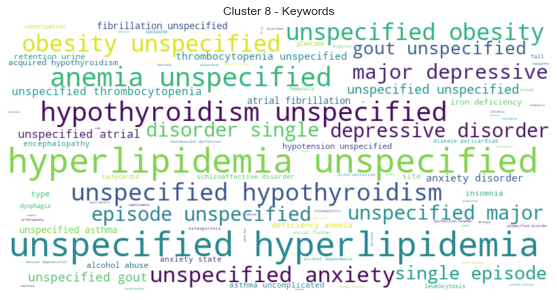

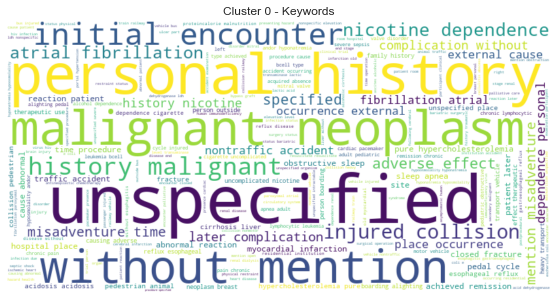

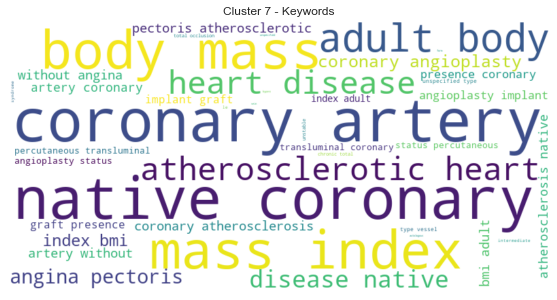

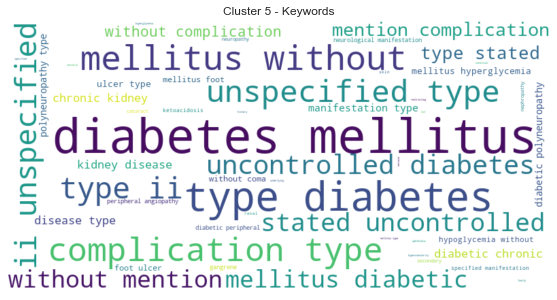

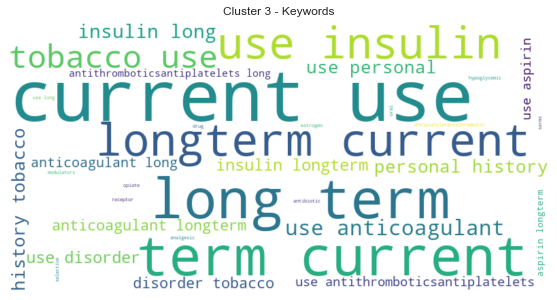

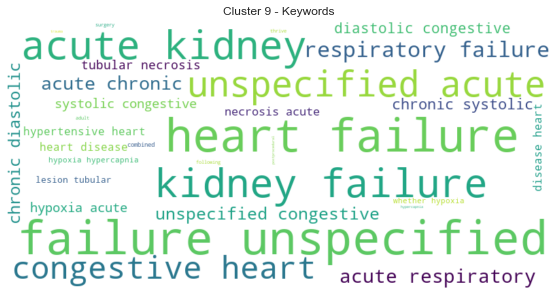

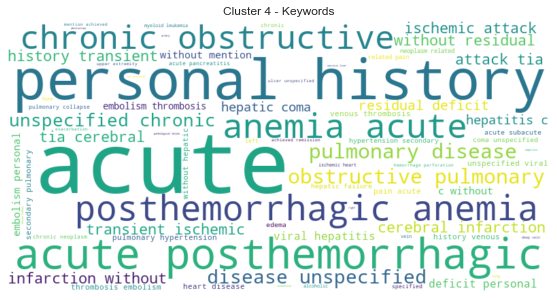

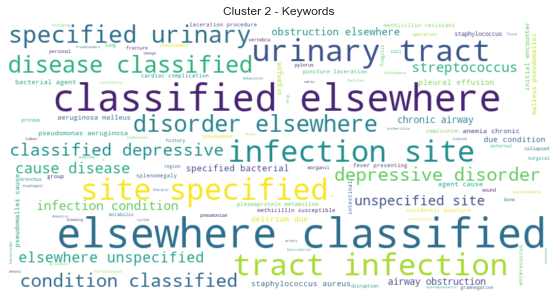

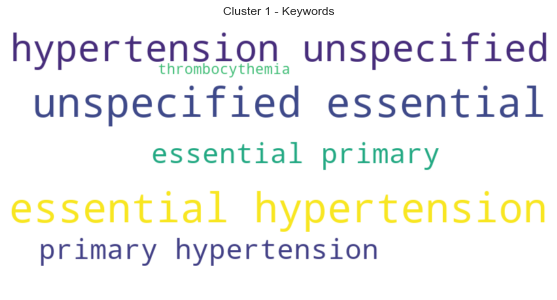

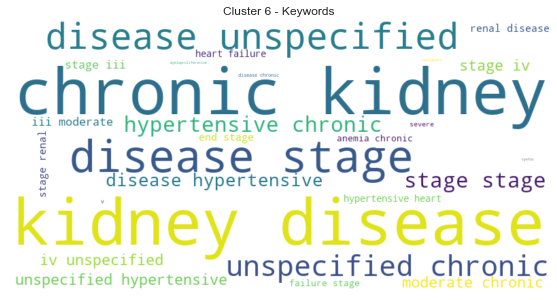

In [367]:
from wordcloud import WordCloud


for label, descriptions in clusters.items():
    wordcloud_text = ' '.join(descriptions)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {label} - Keywords")
    plt.axis('off')
    plt.show()